# IMDB Data (CADS Event)

The data we're working with is general imdb data and since it's October, we're really only interested in scary movies.
The dataset has 14,000 movies in total and came from https://www.kaggle.com/orgesleka/imdbmovies. (Keep in mind this data is a bit messy)

Before we get started, we need to get our tools ready first:
* NumPy and Scipy are numerical computation packages which we'll definitely need
* Pandas uses special dataframes which makes data manipulation a cake walk
* Matplotlib and Seaborn make everything nice and pretty 
    * Make sure you have "%matplotlib inline" included so that your plots load correctly in the notebook


In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Now to load the data! If this isn't working, check to make sure the csv file is in the same directory as the notebook

In [2]:
movies = pd.read_csv('imdb.csv')

# Cleaning the data

Before we get to do anything cool, we need to clean up the data so that it's actually usable. Many of the columns have data that isn't in the form we want it or it might even be misplaced. For instance you may stumble upon URLs in some of the numerics columns which isn't really what we want.

In [3]:
movies.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,...,0,0,1,0,0,0,0,0,0,0


First let's trim out all the columns we really don't care about

In [4]:
movies.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [5]:
movies = movies[['title', 'wordsInTitle', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
        'nrOfGenre','Horror']]
#Take out all the non-horror movies
movies = movies[movies.Horror != 0]

#Remove horror since it's redundant
movies = movies.drop(["Horror"],axis=1)
movies.dtypes

title               object
wordsInTitle        object
imdbRating          object
ratingCount         object
duration            object
year                object
type                object
nrOfWins            object
nrOfNominations     object
nrOfPhotos          object
nrOfNewsArticles    object
nrOfUserReviews      int64
nrOfGenre            int64
dtype: object

We'd rather most of these columns be numerics rather than objects/strings so let's make it happen

Also, loop through and trash any not-numbers

In [6]:
colstoint = list(movies.drop(['title','wordsInTitle','type'],axis=1))

for col in colstoint:
    movies[col] = pd.to_numeric(movies[col], errors='coerce')
    
#coerce turns all the errors into NaNs

Now all the datatypes are what we want and even our sporaticly placed data has been handled (for the most part)

In [7]:
movies.dtypes

title                object
wordsInTitle         object
imdbRating          float64
ratingCount         float64
duration            float64
year                float64
type                 object
nrOfWins            float64
nrOfNominations     float64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
dtype: object

In [8]:
movies.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
count,988.000000,1004.000000,1001.000000,1029.000000,1014.000000,1029.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,6.060830,24643.401394,5657.676224,2098.867833,3.472387,1.959184,21.138835,277.766990,167.951456,3.732039
std,1.325899,44346.668042,4357.192326,1345.685642,62.685183,5.367459,59.675028,816.682368,247.100924,19.599688
min,1.500000,5.000000,5.900000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.400000,1898.000000,5100.000000,1979.000000,0.000000,0.000000,3.000000,4.000000,32.000000,2.000000
50%,6.200000,7178.000000,5520.000000,1997.000000,0.000000,0.000000,10.000000,39.500000,84.000000,3.000000
75%,6.900000,25751.500000,6060.000000,2007.000000,1.000000,2.000000,23.000000,180.000000,198.000000,3.000000
max,9.500000,418163.000000,108635.000000,40140.000000,1994.000000,91.000000,1196.000000,12562.000000,3361.000000,511.000000


Just when we thought we were in the clear, we still have a couple of problems. Notice how the first movie/tv episode was made in the year 94 and the last was made in 40140. Maybe let's change this

In [9]:
movies = movies[(movies.year > 1900) & (movies.year < 2018)]

Pandas is usually pretty nice about ignoring null values when doing computations, but we might want to dispose of them to make plotting a little easier

In [10]:
(len(movies),len(movies.dropna()))

(1012, 963)

We lose about 1/20 of our dataset by dropping all the null values which isn't great, but now our data is going to be all neat

In [11]:
movies = movies.dropna()

# Plotting and Actual Fun Stuff

So what's the most popular movie or tv show?

In [12]:
movies.loc[[(movies.nrOfNewsArticles).idxmax()]]
#idxmax is just argmax for pandas

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
8109,The Vampire Diaries (TV Series 2009– ),the vampire diaries tv series,8.2,158261.0,2580.0,2009.0,video.tv,25.0,34.0,1158,12562,231,3


Of course it is

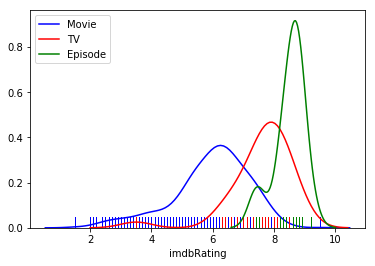

In [13]:
sns.distplot(movies[movies.type=="video.movie"].imdbRating, hist=False, rug=True,color='b', label="Movie")
sns.distplot(movies[movies.type=="video.tv"].imdbRating, hist=False, rug=True,color='r', label="TV")
sns.distplot(movies[movies.type=="video.episode"].imdbRating, hist=False, rug=True,color='g', label="Episode")

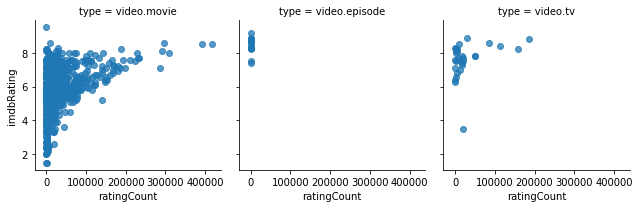

In [14]:
grid = sns.FacetGrid(movies, col="type")
grid.map(plt.scatter, "ratingCount","imdbRating", alpha=.75)

In [15]:
#sns.pairplot(movies, hue="type")        #this is big but fun

Before we actually fit linear models to the data, let's ignore the "video.episode" category since it'll produce an extremely steep slope and we won't be able to see the other two more interesting plots

Try to see what happens if you leave it in

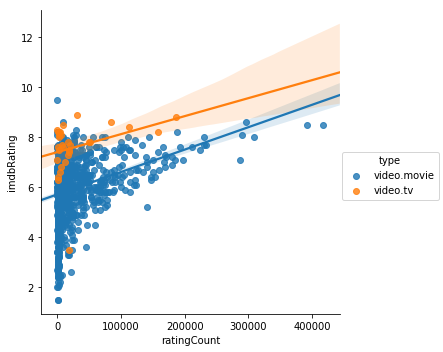

In [16]:
sns.lmplot(x="ratingCount", y="imdbRating",  data=movies[movies.type.str.contains("video.episode") == False], hue='type')

This looks good, but a log fit might be better suited for this

In [80]:
#This scipy function takes a general log function, the input and output data, and estimates a and b

c,k = scipy.optimize.curve_fit(lambda t,a,b: a + b * np.log(t), movies.ratingCount, movies.imdbRating)[0]

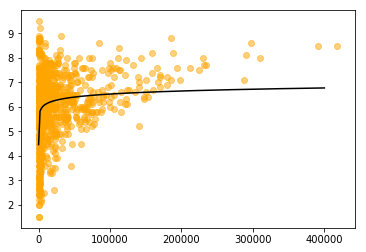

In [81]:
t = np.linspace(1,400000,200)
z = c + k * np.log(t)
plt.plot(t,z,'black')
plt.scatter(movies.ratingCount, movies.imdbRating, color='orange',alpha=.5)

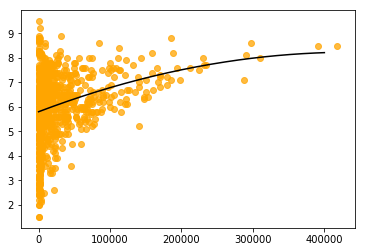

In [77]:
plt.plot(t,np.poly1d(np.polyfit(movies.ratingCount, movies.imdbRating,2))(t),'black')
plt.scatter(movies.ratingCount, movies.imdbRating, color='orange',alpha=.75)

Point is: now that you have your data all prepped, you can experiment with different models and do all sorts of cool things